In [1]:
#!/usr/bin/env python3

import pandas as pd
import errno    
import os
import numpy as np
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

from sklearn.metrics import r2_score


'''
Author: Enrico Ceccolini
    TODO write the description
'''

# settings
interval_comment = "Andrea"
suffix = "_5sec_"
start_time = pd.to_datetime('2014-03-31')
end_time = pd.to_datetime('2014-05-01')

datadir = "/datasets/eurora_data/db1/"
infile_validate_approx = datadir + "CPUs/" + interval_comment + "/validate_approx_" + interval_comment + ".csv"


infile_large_jobs = datadir + "CPUs/" + interval_comment + "/large_jobs_real_pow_" + interval_comment + ".csv"


In [2]:
all_time_interval_power_consumption = pd.read_csv(infile_validate_approx, index_col=0)
all_time_interval_power_consumption.shape

(535681, 127)

In [3]:
def plot_hist(data, n_bins):
    plt.rcParams['figure.figsize'] = (20,5)
    n, bins, patches = plt.hist(data, n_bins, facecolor='blue', alpha=1)
    #plt.axis([-0.4, 0.4, 0, 600])
    plt.xlabel("normalized error", fontsize=20)
    plt.ylabel("num instances", fontsize=20)
    plt.show()

In [4]:
def plot_line(data_dates, data_real, data_approx, days_interval):
    plt.rcParams['figure.figsize'] = (20,5)

    X_AXIS_NAME = 'Time (min)'
    Y_AXIS_NAME = 'Power (W)'
    # TITLE = 'Nodes power consumption - Andrea\'s data'

    fig, ax = plt.subplots()
    ax.xaxis.get_majorticklabels()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=days_interval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(axis='both', which='major', labelsize=15)

    dates = []
    colors = ("blue", "green")

    for ts in data_dates['timestamp']:
        local_d = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')
        dates.append(local_d)

    #print(len(dates))

    plt.plot(dates, data_approx, c=colors[0])

    plt.plot(dates, data_real, c=colors[1], alpha=1, dashes=[2, 2])
    #plt.scatter(dates, node_data['pow_tot_0'] + node_data['pow_tot_1'])

    #fig.autofmt_xdate()
    plt.xlabel(X_AXIS_NAME, fontsize=20)
    plt.ylabel(Y_AXIS_NAME, fontsize=20)
    # plt.title(TITLE)

    # function to show the plot
    plt.show()
    #fig.savefig('graph.png', dpi=fig.dpi)

### Plot the whole interval

In [5]:
real = all_time_interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = all_time_interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


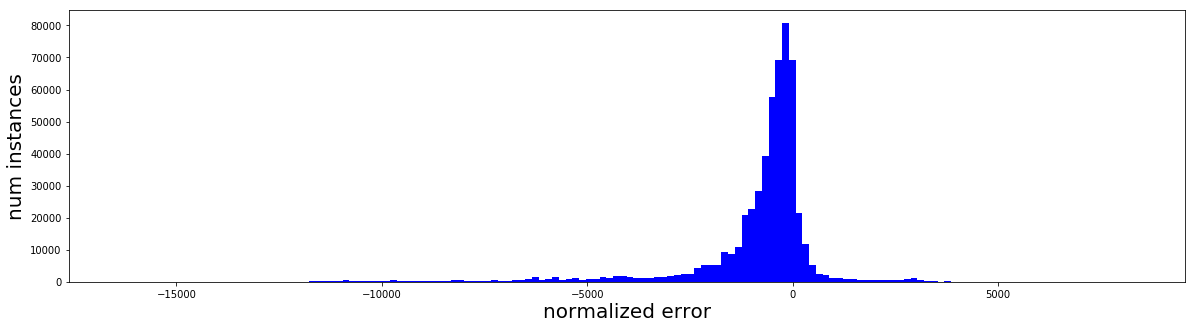

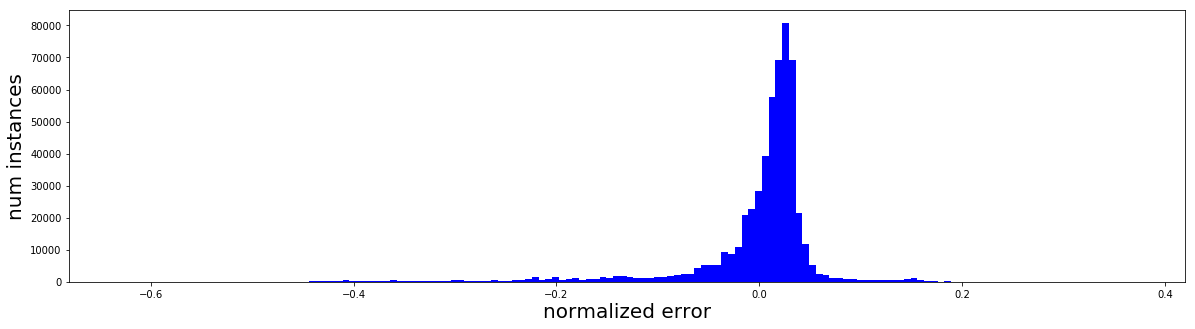

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


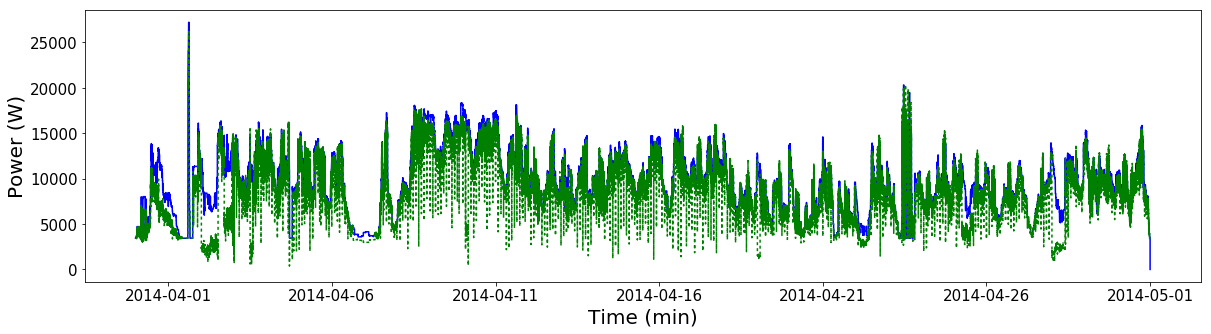

approximation accuracy: 0.730419997406637


In [6]:
real['Total'] = real.iloc[:, -64:-1].sum(axis=1)
approx['Total'] = approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']

plot_hist(n_bins=150, data=differences)
plot_hist(n_bins=150, data=differences_norm)
plot_line(data_dates=all_time_interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=5)

print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

In [7]:
#all_time_interval_power_consumption_correction = all_time_interval_power_consumption.fillna(55.52)
all_time_interval_power_consumption_correction = all_time_interval_power_consumption

### Plot an interval

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


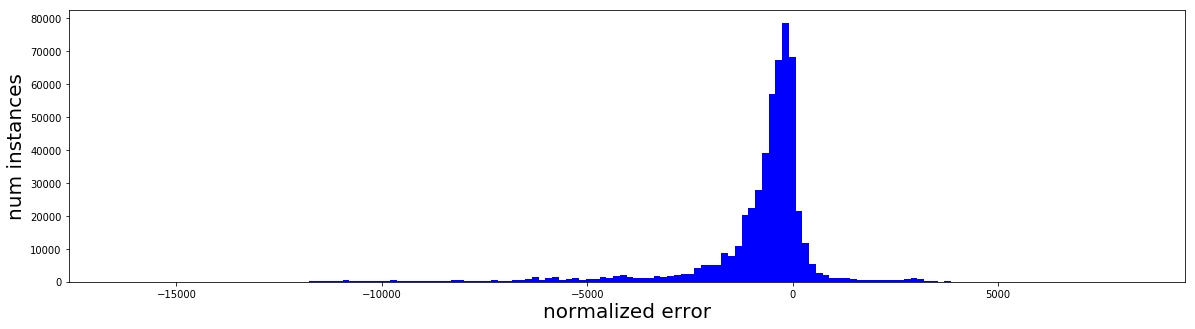

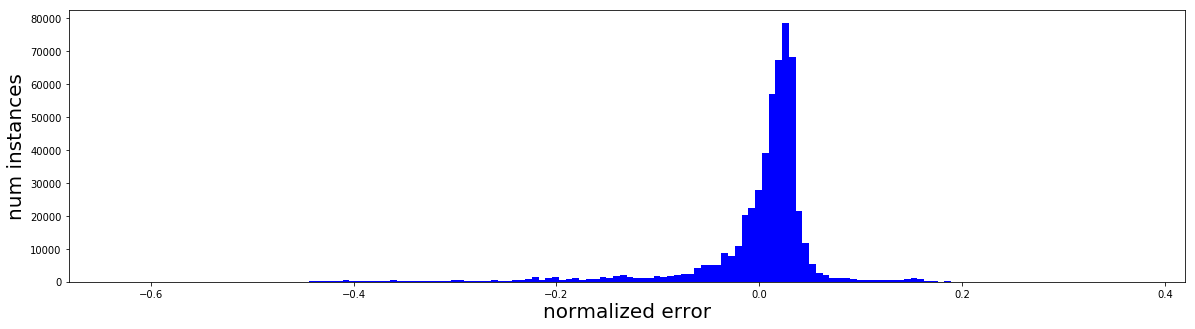

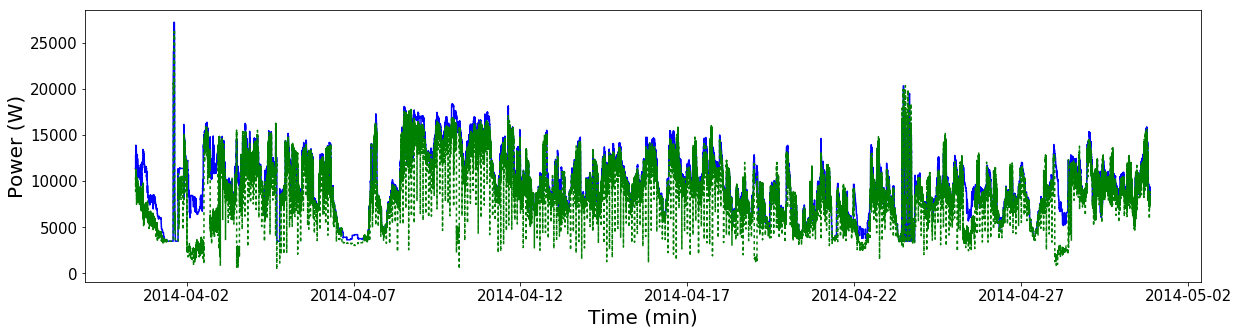

approximation accuracy: 0.7254821165912532


In [8]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-03-31 11:21:00')
interval_end_time = pd.to_datetime('2014-04-30 20:32:00')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']

plot_hist(n_bins=150, data=differences)
plot_hist(n_bins=150, data=differences_norm)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=5)

print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

### three days accuracy

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


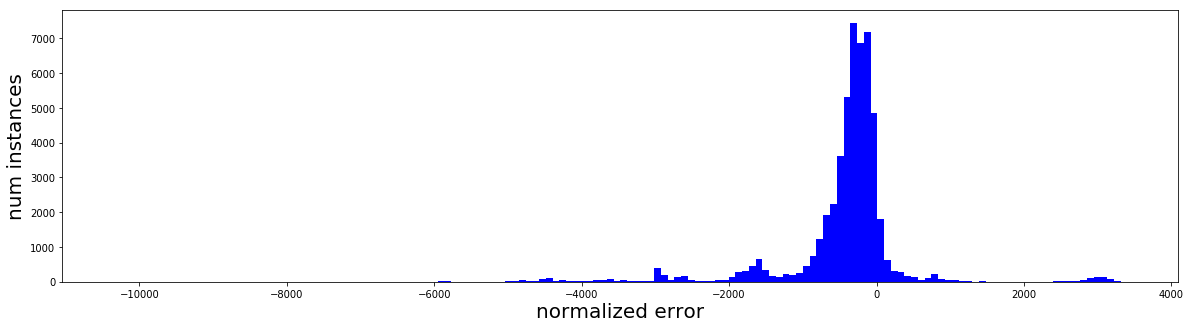

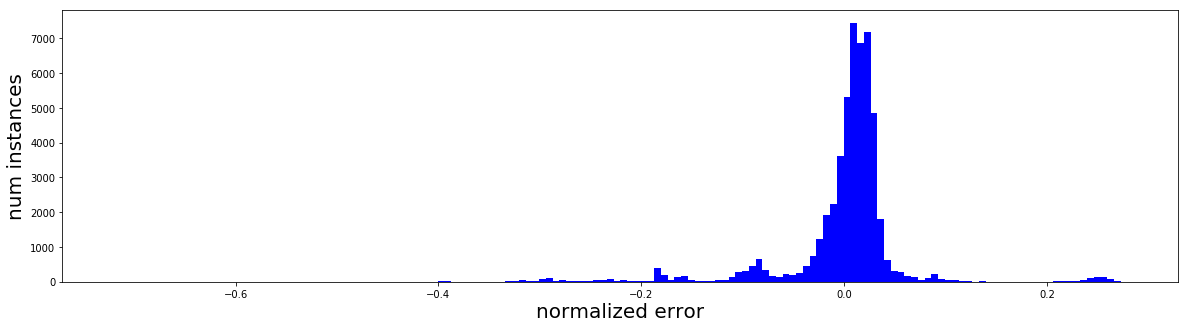

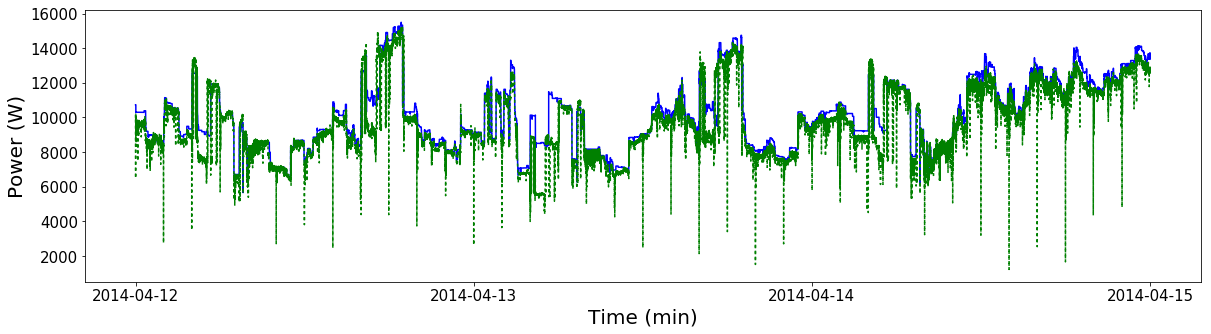

approximation accuracy: 0.7614397634332347


In [9]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-04-12')
interval_end_time = pd.to_datetime('2014-04-15')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']
plot_hist(n_bins=150, data=differences)
plot_hist(n_bins=150, data=differences_norm)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=1)

print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

In [10]:
datadir = "/datasets/eurora_data/db1/"
infile_nodes = datadir + "nodes.csv"

nodes = pd.read_csv(infile_nodes, index_col=0)

In [11]:
all_time_interval_power_consumption_correction = all_time_interval_power_consumption

for node_index, node_row in nodes.iterrows():
    node_id = node_row['node_id']
    core_idle = node_row['core_idle']
    idle_consumption = core_idle * 16
    if( int(node_id) < 10):
        node_id = "0" + str(node_id)
    else:
        node_id = str(node_id)
    # print(node_id)
    if (node_id != "43"):
        all_time_interval_power_consumption_correction[node_id + "_real"].fillna(idle_consumption, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


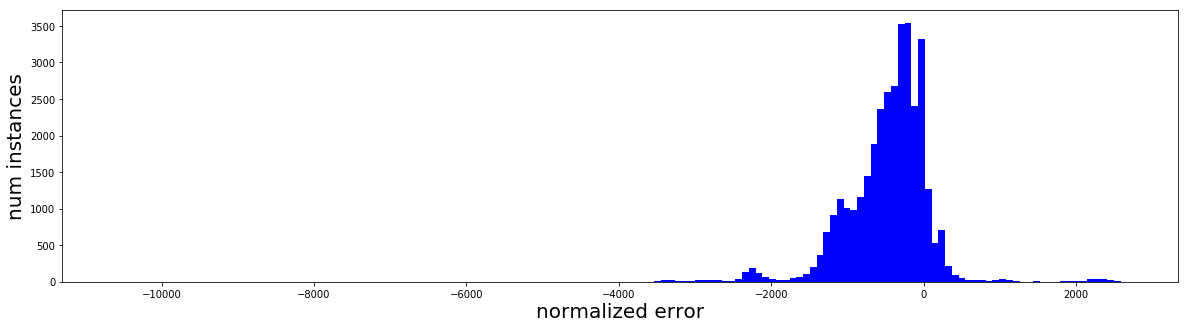

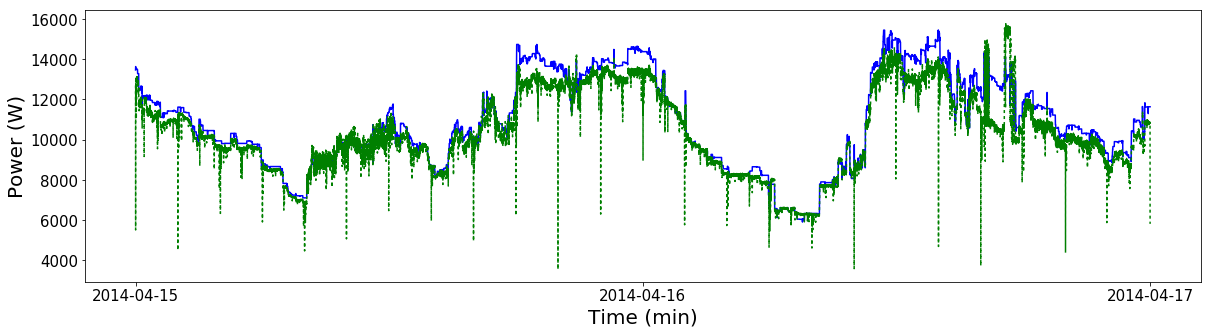

approximation accuracy: 0.8644087838406522


In [12]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-04-15')
interval_end_time = pd.to_datetime('2014-04-17')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']
plot_hist(n_bins=150, data=differences)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=1)
print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


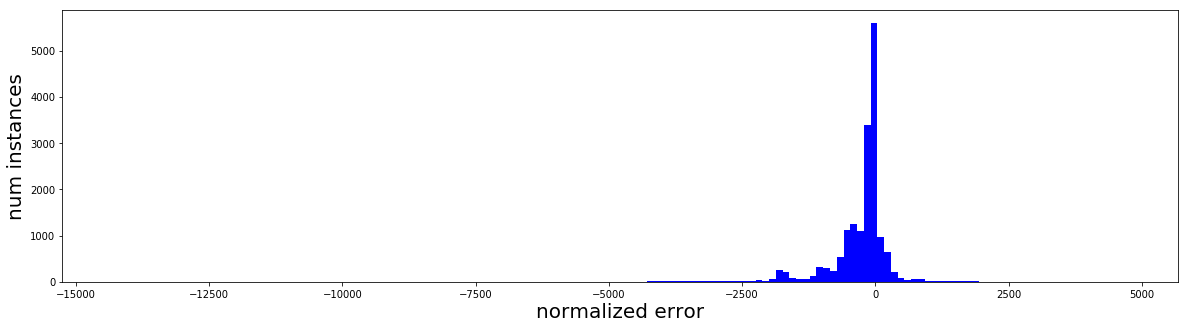

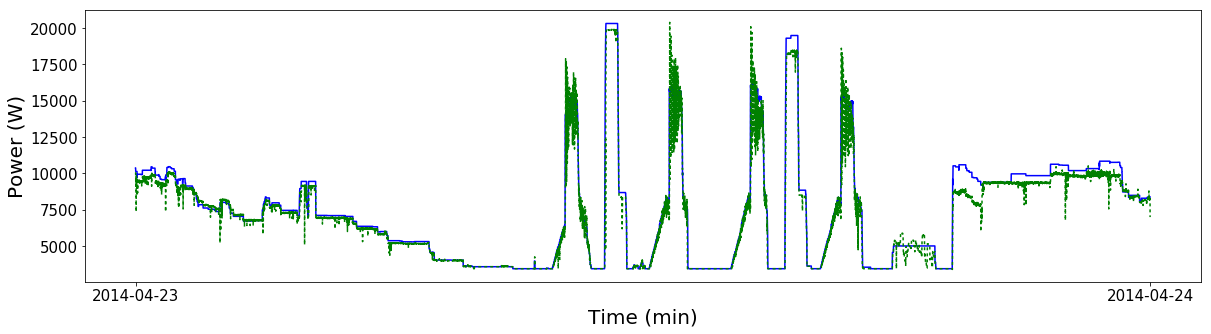

approximation accuracy: 0.9516752947018813


In [13]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-04-23')
interval_end_time = pd.to_datetime('2014-04-24')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']
plot_hist(n_bins=150, data=differences)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=1)
print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


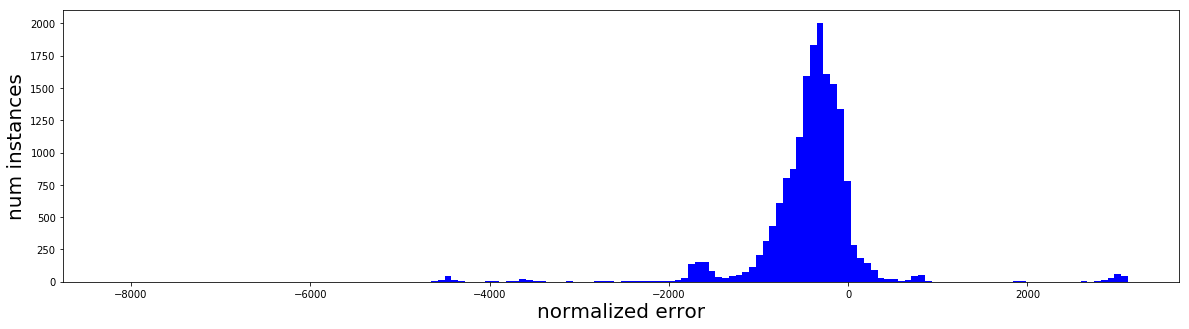

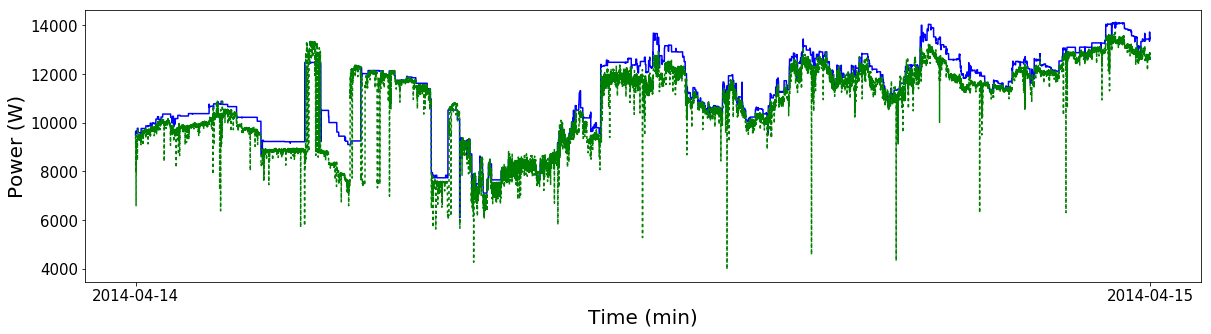

approximation accuracy: 0.7757784733196341


In [14]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-04-14')
interval_end_time = pd.to_datetime('2014-04-15')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']
plot_hist(n_bins=150, data=differences)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=1)
print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

### Validate predictions

In [5]:
all_time_interval_power_consumption.head(1)

,timestamp,01_real,01_approx,02_real,02_approx,03_real,03_approx,04_real,04_approx,05_real,...,60_real,60_approx,61_real,61_approx,62_real,62_approx,63_real,63_approx,64_real,64_approx
0,2014-03-31 00:00:00,51.829711,51.829711,52.545694,52.545694,55.334445,55.334445,54.319729,54.319729,54.601864,...,56.300235,56.300235,58.469255,58.469255,57.131946,57.131946,57.212285,57.212285,59.787256,59.787256


In [ ]:
real = all_time_interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = all_time_interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)

In [ ]:
real['Total'] = real.iloc[:, -64:-1].sum(axis=1)
approx['Total'] = approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']

plot_hist(n_bins=150, data=differences)
plot_hist(n_bins=150, data=differences_norm)
plot_line(data_dates=all_time_interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=5)

print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))